In [ ]:
#Reducing dimensionality with PCA

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
iris = datasets.load_iris()
iris_X = iris.data
y = iris.target

from sklearn import decomposition
pca = decomposition.PCA()
pca

PCA()

In [4]:
iris_pca = pca.fit_transform(iris_X)
iris_pca[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
         2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
         9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
         1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
        -7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
        -6.12585926e-02]])

In [6]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [8]:
pca = decomposition.PCA(n_components=2)
iris_X_prime = pca.fit_transform(iris_X)
iris_X_prime.shape

(150, 2)

In [10]:
pca.explained_variance_ratio_.sum()

0.9776852063187962

Text(0.5, 1.0, 'After PCA')

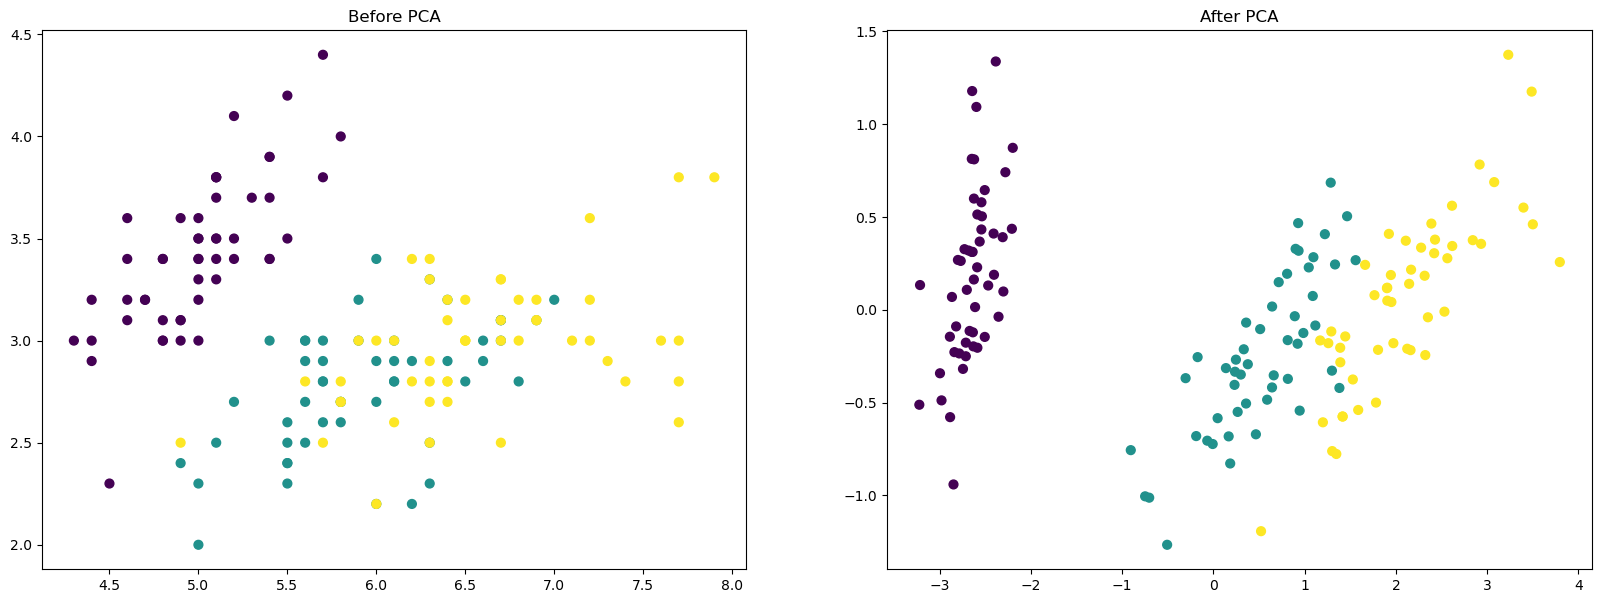

In [12]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X[:,0],iris_X[:,1],c=y,s=40)
ax.set_title('Before PCA')

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_prime[:,0],iris_X_prime[:,1],c=y,s=40)
ax2.set_title('After PCA')

In [14]:
pca = decomposition.PCA(n_components=.98)
iris_X_prime = pca.fit(iris_X).transform(iris_X)
pca.explained_variance_ratio_.sum()

0.9947878161267255

In [16]:
iris_X_prime

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [18]:
from sklearn import preprocessing

iris_X_scaled = preprocessing.scale(iris_X)
pca = decomposition.PCA(n_components=2)
iris_X_scaled = pca.fit_transform(iris_X_scaled)

Text(0.5, 1.0, 'Scaling followed by PCA')

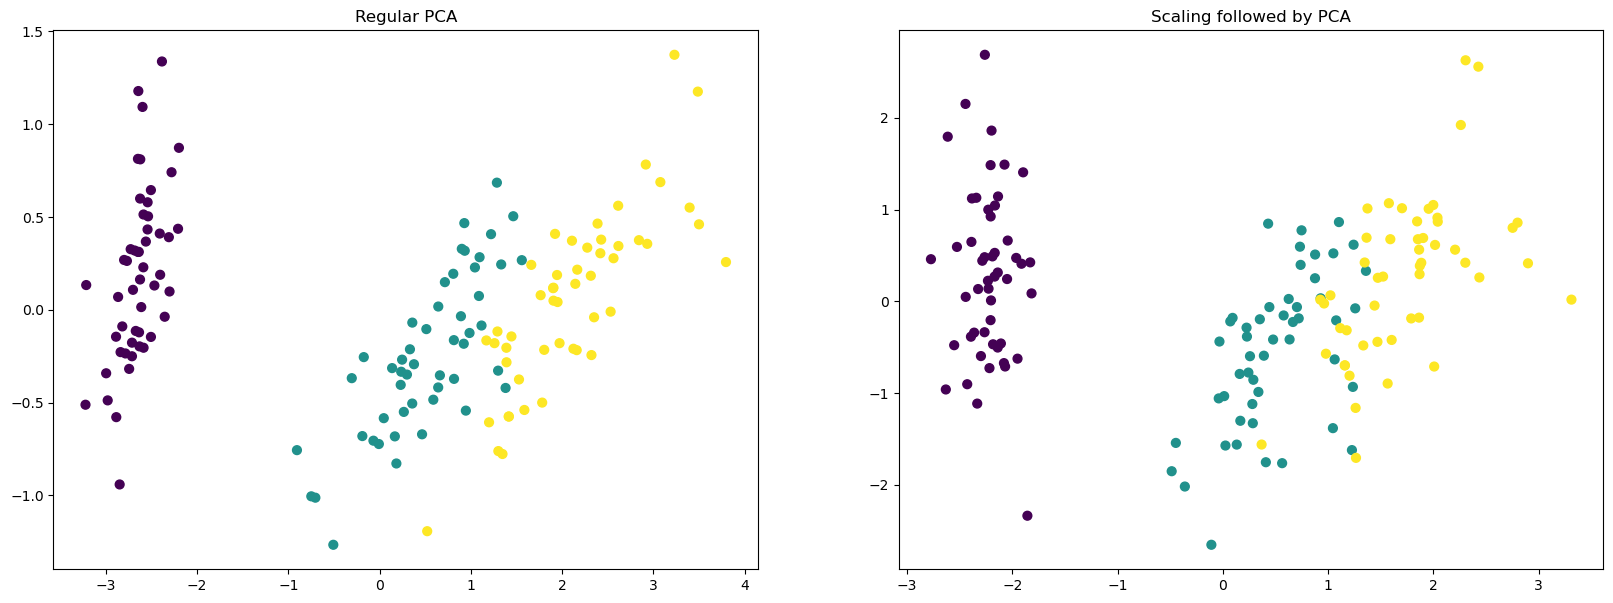

In [20]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X_prime[:,0],iris_X_prime[:,1],c=y,s=40)
ax.set_title('Regular PCA')

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_scaled[:,0],iris_X_scaled[:,1],c=y,s=40)
ax2.set_title('Scaling followed by PCA')

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('pca',decomposition.PCA(n_components=2))])
iris_X_scaled = pipe.fit_transform(iris_X)